In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt

## Problem 1

In [3]:
def cos_sim(x, y):
    return np.dot(x, y) / np.linalg.norm(x) / np.linalg.norm(y)

### 1.1

In [4]:
from sanger import SangerNet

In [5]:
# Load data
iris_df = pd.read_csv("Iris.txt")
iris_np = iris_df.to_numpy()[:, :4].T.astype(np.float32)
iris_np_no_std = iris_np.copy()

# Standardize
iris_np -= iris_np.mean(axis=1)[:, None]
iris_np /= iris_np.std(axis=1)[:, None]

In [6]:
snet = SangerNet()
snet.learn(iris_np)

# Sanity check: PCs should be orthogonal
snet.w_norm @ snet.w_norm.T

Iteration 0: delta norm 0.4616790433054635
Iteration 1000: delta norm 0.002542984244879118
Iteration 2000: delta norm 6.389874814718116e-05
Iteration 3000: delta norm 1.605097754291998e-06
Iteration 4000: delta norm 4.031906941647434e-08
Iteration 5000: delta norm 1.0127902312175627e-09
Iteration 6000: delta norm 2.544072270234384e-11
Iteration 7000: delta norm 6.390751999078114e-13
Iteration 8000: delta norm 1.615380605137105e-14
Iteration 9000: delta norm 2.296284778550108e-15


array([[ 1.        , -0.24301772,  0.26275768, -0.26190718],
       [-0.24301772,  1.        , -0.93103617,  0.8380725 ],
       [ 0.26275768, -0.93103617,  1.        , -0.9772206 ],
       [-0.26190718,  0.8380725 , -0.9772206 ,  1.        ]])

### 1.2

Different

### 1.3

Text(0, 0.5, 'Variance explained')

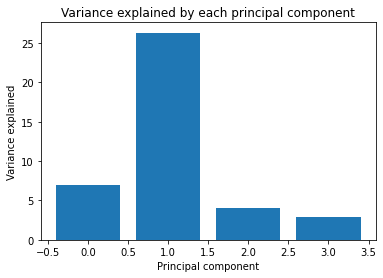

In [7]:
# plot variances v.s. principal component
plt.bar([i for i in range(4)], np.linalg.norm(snet.w, axis=1))
plt.title("Variance explained by each principal component")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")

### 1.4

In [8]:
# Run Sanger's Rule without standardization
snet_no_std = SangerNet()
snet_no_std.learn(iris_np_no_std)

# Sanity check: PCs should be orthogonal
snet_no_std.w_norm @ snet_no_std.w_norm.T

Iteration 0: delta norm 16.77997506038641
Iteration 1000: delta norm 2.2409157113027846e+133
Iteration 2000: delta norm inf
Iteration 3000: delta norm nan
Iteration 4000: delta norm nan
Iteration 5000: delta norm nan
Iteration 6000: delta norm nan


/Users/kevin/Documents/College/Classes/2022/9.53/pset-2/sanger.py:15: RuntimeWarning: overflow encountered in matmul
  delta = (y @ x.T) - np.tril(y @ y.T) @ self.w
/Users/kevin/Documents/College/Classes/2022/9.53/pset-2/sanger.py:15: RuntimeWarning: invalid value encountered in matmul
  delta = (y @ x.T) - np.tril(y @ y.T) @ self.w
/Users/kevin/Documents/College/Classes/2022/9.53/pset-2/sanger.py:19: RuntimeWarning: invalid value encountered in add
  self.w += delta


Iteration 7000: delta norm nan
Iteration 8000: delta norm nan
Iteration 9000: delta norm nan


array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

### 1.5

In [9]:
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(iris_np.T)
pc, var = pca.components_, pca.explained_variance_

In [10]:
[cos_sim(pc[i], snet.w[i]) for i in range(4)]

[0.3789330409815708,
 -0.13794790335149712,
 0.18696765171959773,
 -0.06869309160650465]

In [11]:
var

array([2.9321945 , 0.92489046, 0.14885071, 0.02109133], dtype=float32)

### 1.6

In [12]:
# render the data using 2 PC's

## Problem 2

### 2.1